# < 과제 #3 : Regression >

## 빅데이터분석 B
## 컴퓨터 공학부 201858036 박현수

### HW3.csv 파일에는 은행고객의 수입(Income), 신용한도(Limit), 신용점수(Rating), 신용카드 개수(Cards), 나이(Age), 교육년수(Education), 
### 성별(Gender), 학생 여부(Student), 결혼 여부(Married), 인종(Ethnicity), 그리고 잔고(Balance)가 저장되어 있다. 
### Balance를 레이블로 하는 아래 회귀분석을 실시하시오.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1) 파일을 읽어 데이터프레임을 생성하고 처음 3개의 샘플을 출력하시오. 

In [59]:
df = pd.read_csv("HW3.csv", index_col=0)

In [60]:
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


#### 1) 특성의 개수와 샘플(관측치)의 개수를 구하고 결측치가 있는지 알아보시오. 

In [61]:
print("특성의 개수 : ", len(df.columns))
print("샘플(관측치)의 개수 : ", len(df.index))
print("결측치 여부 : \n", df.isnull().sum())

특성의 개수 :  11
샘플(관측치)의 개수 :  400
결측치 여부 : 
 Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64


#### 수치형 특성과 범주형 특성은 무엇인지 파악하시오. 
* 수치형 특성 : 이산형(정수)과 연속형(실수)으로 이루어진 자료를 의미
* 범주형 특성 : 몇개의 범주로 이루어진 자료를 의미하며, 유한개의 가능한 값들 중 하나를 취함. 명목형과 순서형으로 이루어짐.

#### 2) 수치형 특성과 레이블에 대하여는 히스토그램을 작성하고 범주형 특성에 대하여는 막대그래프를 작성하고 간단히 코멘트 하시오.

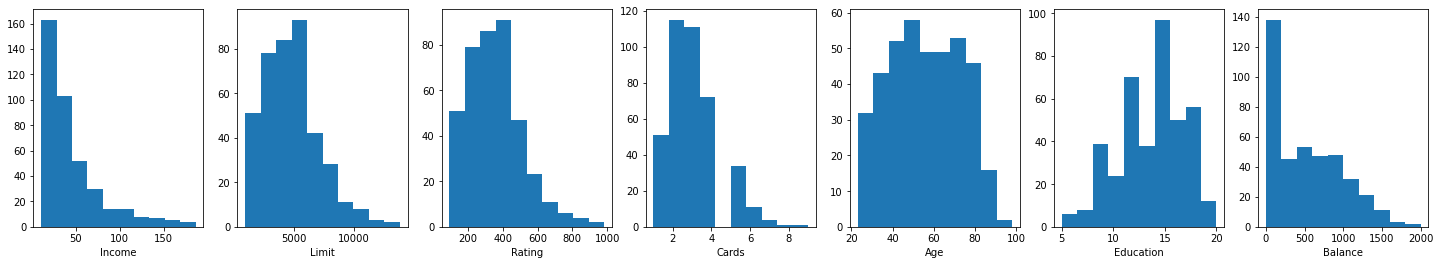

In [40]:
plt.figure(figsize=(25,4))

plt.subplot(1, 7, 1)
plt.hist(df.Income)
plt.xlabel("Income")

plt.subplot(1, 7, 2)
plt.hist(df.Limit)
plt.xlabel("Limit")

plt.subplot(1, 7, 3)
plt.hist(df.Rating)
plt.xlabel("Rating")

plt.subplot(1, 7, 4)
plt.hist(df.Cards)
plt.xlabel("Cards")

plt.subplot(1, 7, 5)
plt.hist(df.Age)
plt.xlabel("Age")

plt.subplot(1, 7, 6)
plt.hist(df.Education)
plt.xlabel("Education")

plt.subplot(1, 7, 7)
plt.hist(df.Balance)
plt.xlabel("Balance");

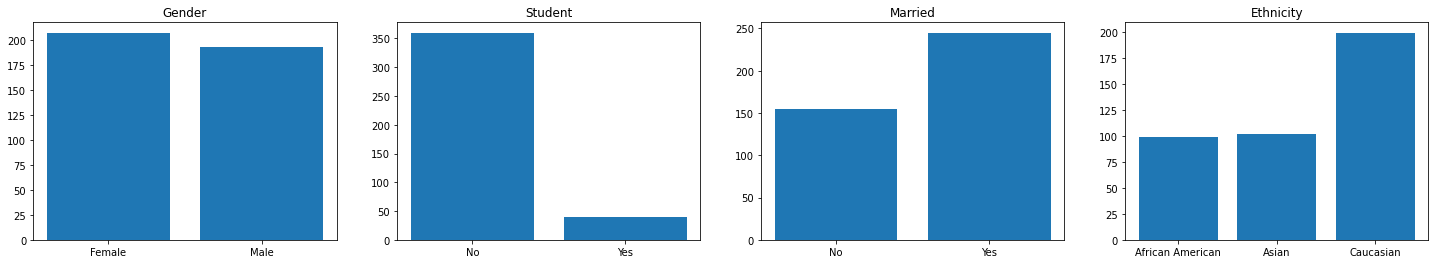

In [41]:
plt.figure(figsize=(25,4))

plt.subplot(1, 4, 1)
gender = df.groupby('Gender')["Gender"].count()
plt.bar( gender.index, gender.values)
plt.title('Gender')

plt.subplot(1, 4, 2)
student = df.groupby('Student')["Student"].count()
plt.bar( student.index, student.values)
plt.title('Student')

plt.subplot(1, 4, 3)
married = df.groupby('Married')["Married"].count()
plt.bar( married.index, married.values)
plt.title('Married')

plt.subplot(1, 4, 4)
ethnicity = df.groupby('Ethnicity')["Ethnicity"].count()
plt.bar( ethnicity.index, ethnicity.values)
plt.title('Ethnicity')

plt.show()

#### 3) 데이터프레임에 corr() 메서드를 적용하여 변수들간의 상관계수를 출력하고 해석하시오. 

In [42]:
df.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


* 상관계수 : 두 변수 간의 연관된 정도를 나타내는 것. (단, 인과관계를 설명하는 것은 아님.)
* 상관관계 분석에서는 주로 피어슨 상관계수가 보편적으로 사용됨.  
* 정의: r = x와 y가 함께 변하는 정도 / x와 y가 각각 변하는 정도
 
* r 값은 x와 y가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일하면 -1 값을 가짐.
* ex) Rating과 Balance의 경우 0.863625으로 강한 양의 값을 가짐.

#### 4) 각 수치형 특성과 Balance(잔고) 변수와의 산점도를 아래와 같은 subplot으로 작성하시오.

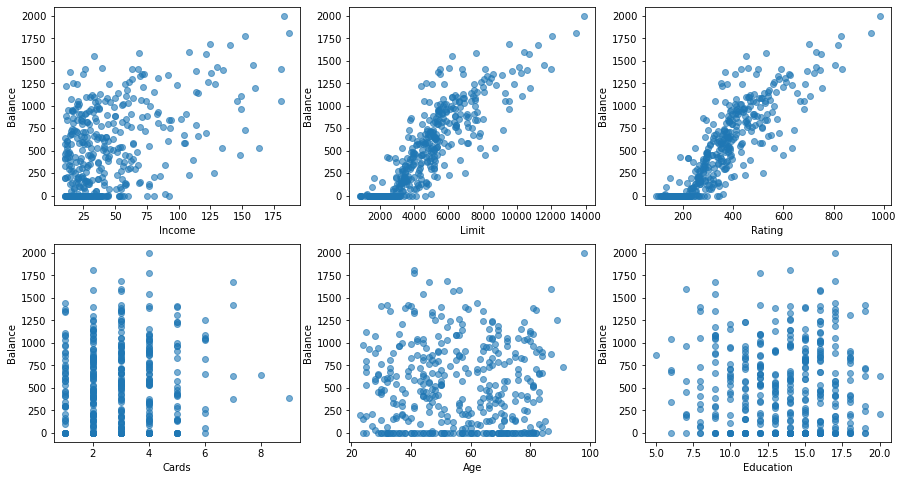

In [20]:
plt.figure(figsize=(15,8))

balance = df.Balance

plt.subplot(2, 3, 1)
plt.scatter(df.Income, balance, alpha = 0.6)
plt.xlabel("Income")
plt.ylabel("Balance")

plt.subplot(2, 3, 2)
plt.scatter(df.Limit, balance, alpha = 0.6)
plt.xlabel("Limit")
plt.ylabel("Balance")

plt.subplot(2, 3, 3)
plt.scatter(df.Rating, balance, alpha = 0.6)
plt.xlabel("Rating")
plt.ylabel("Balance")

plt.subplot(2, 3, 4)
plt.scatter(df.Cards, balance, alpha = 0.6)
plt.xlabel("Cards")
plt.ylabel("Balance")

plt.subplot(2, 3, 5)
plt.scatter(df.Age, balance, alpha = 0.6)
plt.xlabel("Age")
plt.ylabel("Balance")

plt.subplot(2, 3, 6)
plt.scatter(df.Education, balance, alpha = 0.6)
plt.xlabel("Education")
plt.ylabel("Balance");

#### 5) Rating(신용점수) 변수를 특성으로 하고 Balance(잔고) 변수를 레이블로 하는 단순선형회귀모형을 훈련하고
#### 산점도에 회귀직선식을 표시하고 이 모형의 결정계수(R^2)을 구하시오.

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
rating = df.Rating.values.reshape(-1, 1)
reg.fit(rating, df.Balance)
pred = reg.predict(rating)

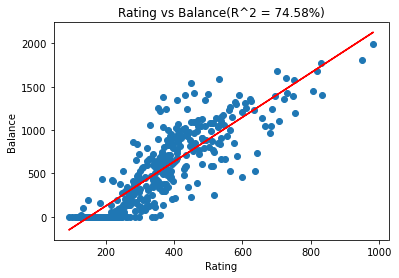

In [22]:
plt.scatter(df.Rating, df.Balance)

plt.title("Rating vs Balance(R^2 = 74.58%)")
plt.plot(df["Rating"], pred,  color='red')
plt.xlabel("Rating"); plt.ylabel("Balance");

In [23]:
print("결정계수(R^2) :", reg.score(rating, df.Balance))

결정계수(R^2) : 0.7458484180585037


#### 6) 수치형 특성들만 포함하여 데이터를 훈련용과 테스트용으로 7:3으로 분할(random_state=0)하여 선형회귀모형을 훈련시키고 훈련데이터와 테스트데이터에 대한 결정계수를 구하시오.

In [48]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :6].values

y = df['Balance'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

reg2 = LinearRegression()
reg2.fit(X_train, y_train)

LinearRegression()

In [49]:
reg2.score(X_train, y_train) # 훈련데이터 결정계수

0.8857073035585357

In [50]:
reg2.score(X_test, y_test) # 테스트데이터 결정계수

0.8557914117915563

#### 과대적합이나 과소적합이 의심되는지 코멘트 하시오.
* train R^2의 값이 1에 가까우므로 과소적합은 아님
* train R^2의 값과 test R^2의 값이 근사하므로 과대적합도 아님

#### Income이 100, Limit가 6000, Rating이 550, Card가 5개, 나이가 55, 교육년수가 20인 사람의 잔고를 예측하시오.

In [62]:
predCase = [[100, 6000, 550, 5, 55, 20]]
reg2.predict(predCase)

array([641.83257176])